# Extra resource
    - How Many Trees in a Random Forest? Thais Mayumi Oshiro, Pedro Snatoro Perez, and Jose Augusto Baranauskas
    - Random Forest Classifier for remote sensing classification. M.Pal
    - Real-Time Human Pose Recongnition in Parts from Single Depth Images. Jamie Shotton, et all.
    - A RAdnom Forest Guided Tour. Géraud Biau and Erwan Scornet

# Case of study

- Extramarital affairs
- Step by step
  1. Isolate X and Y
  2. Transform Y into binary format
  3. Create a dummy variable out of the occupation variable
  4. Transform X string variables into dummies
  5. Perform Random Forest
  6. Create Importance Drivers


# Imports

In [ ]:
import numpy as np
import pandas as pd

# Load data

In [ ]:
data = pd.read_csv("Affairs dataset.csv")
data.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [ ]:
data.affairs.unique()

array([ 0,  3,  7, 12,  1,  2])

# Data prep

isolate X and Y

In [ ]:
y = data.iloc[:,1]
X = data.iloc[:,2:]
X.head(1)

,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,male,37.0,10.0,no,3,18,7,4


In [ ]:
#transform y variable into binary
y = np.where(y > 0,1,0)

In [ ]:
#transform numerical variable into dummy
X = pd.get_dummies(X, drop_first=True, columns = ['occupation'])
X.head()

,gender,age,yearsmarried,children,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7
0,male,37.0,10.00,no,3,18,4,0,0,0,0,0,1
1,female,27.0,4.00,no,4,14,4,0,0,0,0,1,0
2,female,32.0,15.00,yes,1,12,4,0,0,0,0,0,0
3,male,57.0,15.00,yes,5,18,5,0,0,0,0,1,0
4,male,22.0,0.75,no,2,17,3,0,0,0,0,1,0


In [ ]:
#transform categorical variables into dummy
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,yearsmarried,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,gender_male,children_yes
0,37.0,10.00,3,18,4,0,0,0,0,0,1,1,0
1,27.0,4.00,4,14,4,0,0,0,0,1,0,0,0
2,32.0,15.00,1,12,4,0,0,0,0,0,0,0,1
3,57.0,15.00,5,18,5,0,0,0,0,1,0,1,1
4,22.0,0.75,2,17,3,0,0,0,0,1,0,1,0


#Random Forest and Driver Importance

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10,
                               random_state = 1502)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1502,
                       verbose=0, warm_start=False)

In [ ]:
X.shape

(601, 13)

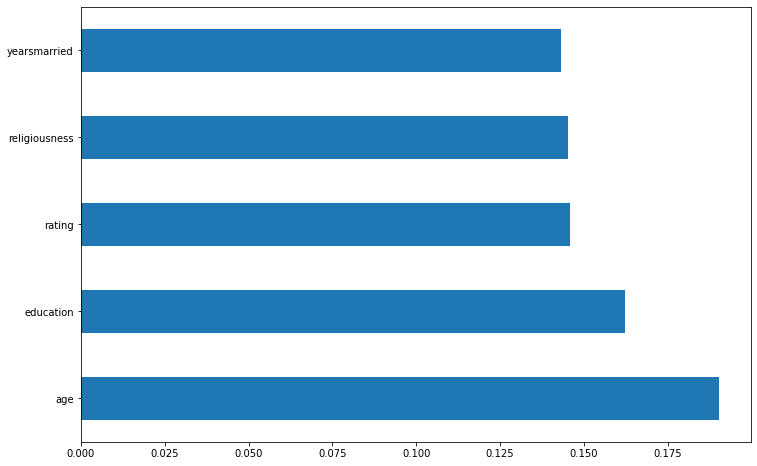

In [ ]:
#Driver Importance 
importance = pd.Series(model.feature_importances_,
                       index = X.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (12, 8))